In [1]:
%matplotlib inline

## ORB feature detector and binary descriptor
ORB adalah perpaduan antara detektor keypoint FAST dan deskriptor BRIEF dengan beberapa fitur tambahan untuk meningkatkan kinerja computer vision. FAST adalah Features from Accelerated Segment Test yang digunakan untuk mendeteksi fitur dari gambar yang disediakan, dan juga menggunakan metode piramida untuk menghasilkan fitur multiskala.

### Import Library

In [2]:
from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

### Membaca Data

In [3]:
img1 = rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                                  translation=(0, -200))
img3 = transform.warp(img1, tform)

### Implementasi ORB

In [4]:
descriptor_extractor = ORB(n_keypoints=200)
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)


### Visualisasi hasil ORB

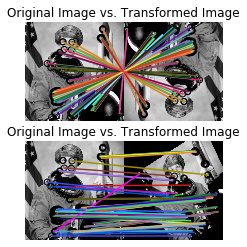

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 4))
plt.gray()
plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")
plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")
plt.show()